# Load image

In [ ]:
! pip install tensorflow==2.16.2

In [1]:
! pip uninstall numpy -y
! pip install numpy==1.26.4

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp310-cp310-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_10_9_x86_64.whl (20.6 MB)


In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

2025-03-20 15:57:52.804041: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
! pwd

/Users/luckas/code/mahshid90/waste_classification/notebooks


In [4]:
img = load_img("/Users/timobuchholz/code/mahshid90/waste_classification/raw_data/train_val_test/trash-type-image-dataset-tvt/test/metal/metal_407.jpg")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/timobuchholz/code/mahshid90/waste_classification/raw_data/train_val_test/trash-type-image-dataset-tvt/test/metal/metal_407.jpg'

# Preprocess image

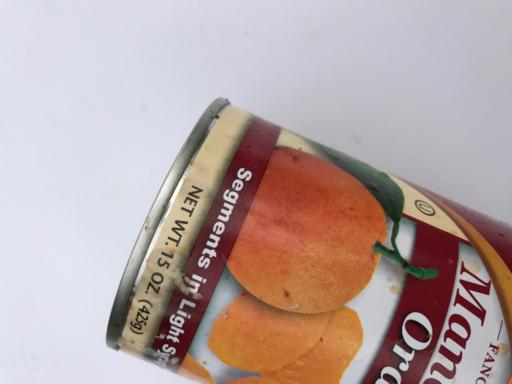

In [ ]:
img

In [ ]:
from PIL import Image

In [ ]:
# Resize to 384x384
img = img.resize((384, 384))

img = img_to_array(img)  # We don't divide by 255 here because the custom preprocessing from ResNet which we apply later does that already
x = img.reshape((-1, 384, 384, 3))


In [ ]:
x

array([[[[227., 226., 240.],
         [227., 226., 240.],
         [226., 225., 239.],
         ...,
         [191., 189., 200.],
         [191., 189., 200.],
         [191., 189., 200.]],

        [[227., 226., 240.],
         [227., 226., 240.],
         [227., 226., 240.],
         ...,
         [191., 189., 200.],
         [191., 189., 200.],
         [191., 189., 200.]],

        [[228., 227., 241.],
         [228., 227., 241.],
         [227., 226., 240.],
         ...,
         [191., 189., 200.],
         [191., 189., 200.],
         [191., 189., 200.]],

        ...,

        [[227., 229., 242.],
         [227., 229., 242.],
         [226., 228., 241.],
         ...,
         [139.,  78.,  58.],
         [172.,  92.,  61.],
         [190.,  97.,  60.]],

        [[227., 229., 242.],
         [227., 229., 242.],
         [226., 228., 241.],
         ...,
         [153.,  85.,  62.],
         [187.,  99.,  65.],
         [191.,  92.,  51.]],

        [[227., 229., 242.],
       

In [ ]:
x.shape

(1, 384, 384, 3)

# Load model


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model("../models/custom_resnet50_model_v3.keras")

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
x = preprocess_input(x)

# Predict

In [ ]:
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
prediction = model.predict(x)
predicted_class = classes[(np.argmax(prediction[0]))]
print(predicted_class)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
metal
[[2.8502222e-05 1.7916788e-07 9.9995899e-01 2.9648038e-06 5.4105357e-07
  8.6769833e-06]]
